# Model Evaluations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## FedAvg

In [2]:
fedavg_global = pd.read_csv('/net/scratch/kmballantyne/msds_final/scripts/global_metrics.csv')
fedavg_client = pd.read_csv('/net/scratch/kmballantyne/msds_final/scripts/per_client_metrics.csv')

In [3]:
fedavg_global

,round,accuracy,recall,auprc
0,round,accuracy,recall,auprc
1,1,0.6599,0.5174,0.5649
2,2,0.6725,0.7089,0.6110
3,3,0.7056,0.5942,0.6470
4,4,0.7276,0.7023,0.6836
5,5,0.7446,0.6936,0.7140
6,6,0.7593,0.7152,0.7400
7,7,0.7689,0.7465,0.7613
8,8,0.7793,0.7344,0.7790
9,9,0.7866,0.7446,0.7957


In [4]:
fedavg_global = fedavg_global.drop(index=fedavg_global.index[0])  # drop first row with round 0
fedavg_global = fedavg_global.reset_index(drop=True)

In [6]:
print(type(fedavg_global["round"][0]))
print(type(fedavg_global["accuracy"][0]))

<class 'str'>
<class 'str'>


In [7]:
fedavg_global['accuracy'] = fedavg_global['accuracy'].astype(float)
fedavg_global['recall']   = fedavg_global['recall'].astype(float)
fedavg_global['auprc']    = fedavg_global['auprc'].astype(float)

In [8]:
fedavg_global

,round,accuracy,recall,auprc
0,1,0.6599,0.5174,0.5649
1,2,0.6725,0.7089,0.6110
2,3,0.7056,0.5942,0.6470
3,4,0.7276,0.7023,0.6836
4,5,0.7446,0.6936,0.7140
5,6,0.7593,0.7152,0.7400
6,7,0.7689,0.7465,0.7613
7,8,0.7793,0.7344,0.7790
8,9,0.7866,0.7446,0.7957
9,10,0.7935,0.7198,0.8093


In [37]:
fedavg_global.to_csv('global_metrics.csv', index=False)

In [9]:
fedavg_client = fedavg_client.rename(columns={'accuracy': 'personal_acc'})

In [10]:
fedavg_client

,round,client,personal_acc,recall,auprc
0,1,client_0,0.6657,0.4877,0.5740
1,1,client_1,0.7000,0.5112,0.5941
2,1,client_2,0.6427,0.5523,0.5799
3,1,client_3,0.6486,0.5546,0.5317
4,1,client_4,0.6459,0.4824,0.5520
5,2,client_0,0.6737,0.6790,0.6195
6,2,client_1,0.7070,0.7070,0.6428
7,2,client_2,0.6440,0.7064,0.6196
8,2,client_3,0.6558,0.7325,0.5721
9,2,client_4,0.6836,0.7214,0.6028


## PerFedAvg

In [11]:
perfedavg_global = pd.read_csv('/net/scratch/kmballantyne/msds_final/scripts/global_metrics_perfedavg.csv')
perfedavg_client = pd.read_csv('/net/scratch/kmballantyne/msds_final/scripts/per_client_metrics_perfedavg.csv')

In [12]:
perfedavg_global

,round,accuracy,recall,auprc,avg_personal_acc
0,1,0.5674,0.4272,0.4431,0.5430
1,2,0.6090,0.0301,0.4513,0.6090
2,3,0.6084,0.0000,0.4541,0.6108
3,4,0.6110,0.1013,0.4662,0.6123
4,5,0.6086,0.0095,0.4770,0.6123
5,6,0.6123,0.0627,0.4841,0.6180
6,7,0.6093,0.0141,0.4932,0.6049
7,8,0.6159,0.1028,0.5019,0.6195
8,9,0.6240,0.1944,0.5085,0.6146
9,10,0.6159,0.0734,0.5172,0.6184


In [13]:
perfedavg_client

,round,client,global_acc,global_recall,global_auprc,personal_acc,personal_recall,personal_auprc
0,1,client_0,0.5420,0.5420,0.4329,0.6100,0.1691,0.4340
1,1,client_1,0.5503,0.5466,0.4515,0.4101,0.9698,0.4600
2,1,client_2,0.5788,0.3062,0.4815,0.5788,0.0465,0.4796
3,1,client_3,0.5911,0.2745,0.4023,0.5590,0.3641,0.3944
4,1,client_4,0.5750,0.4723,0.4586,0.5570,0.5855,0.4551
5,2,client_0,0.6124,0.0395,0.4380,0.6029,0.2099,0.4377
6,2,client_1,0.6236,0.0578,0.4593,0.6196,0.0066,0.4624
7,2,client_2,0.5784,0.0158,0.4753,0.5762,0.0148,0.4679
8,2,client_3,0.6284,0.0042,0.4001,0.6304,0.0000,0.4015
9,2,client_4,0.6068,0.0340,0.4817,0.6158,0.2922,0.4950


## FedAvg + Ditto

In [14]:
ditto_global = pd.read_csv('/net/scratch/kmballantyne/msds_final/scripts/global_metrics_ditto.csv')
ditto_client = pd.read_csv('/net/scratch/kmballantyne/msds_final/scripts/per_client_metrics_ditto.csv')

In [15]:
ditto_global

,round,accuracy,recall,auprc,global_acc_mean,global_acc_std,personal_acc_mean,personal_acc_std
0,1,0.6846,0.7193,0.6181,0.6852,0.0171,0.7338,0.0153
1,2,0.7258,0.5512,0.6956,0.7263,0.0214,0.7712,0.0509
2,3,0.7488,0.5660,0.7433,0.7496,0.0189,0.8280,0.0703
3,4,0.7776,0.7339,0.7756,0.7777,0.0128,0.8537,0.1010
4,5,0.7887,0.7747,0.8007,0.7889,0.0137,0.9318,0.0489
5,6,0.8070,0.6921,0.8313,0.8071,0.0084,0.9912,0.0079
6,7,0.8195,0.8379,0.8493,0.8196,0.0134,0.9963,0.0053
7,8,0.8361,0.8141,0.8723,0.8363,0.0107,0.9893,0.0165
8,9,0.8550,0.8095,0.8936,0.8553,0.0122,0.9857,0.0243
9,10,0.8657,0.7993,0.9090,0.8660,0.0121,0.9960,0.0063


In [16]:
ditto_client

,round,client,global_acc,global_recall,global_auprc,personal_acc,personal_recall,personal_auprc
0,1,client_0,0.6804,0.7321,0.6275,0.7299,0.8321,0.7439
1,1,client_1,0.7141,0.7608,0.6697,0.7618,0.7385,0.7312
2,1,client_2,0.6610,0.6748,0.6260,0.7302,0.7973,0.7412
3,1,client_3,0.6827,0.6919,0.5671,0.7148,0.7465,0.6868
4,1,client_4,0.6876,0.7418,0.5997,0.7320,0.5164,0.7155
5,2,client_0,0.7384,0.5605,0.6937,0.8258,0.6765,0.8582
6,2,client_1,0.7608,0.6110,0.7524,0.8070,0.7740,0.8271
7,2,client_2,0.6994,0.5280,0.6990,0.6789,0.2545,0.8518
8,2,client_3,0.7122,0.5210,0.6485,0.7624,0.3964,0.8621
9,2,client_4,0.7208,0.5402,0.6846,0.7819,0.5255,0.8515


In [59]:
ditto_global["accuracy"].mean()

np.float64(0.7908799999999999)

In [62]:
ditto_client["personal_acc"].mean()

np.float64(0.907694)

## Results

In [17]:
perfedavg_global['round'] = perfedavg_global['round'].astype(int)
perfedavg_client['round'] = perfedavg_client['round'].astype(int)
fedavg_global['round'] = fedavg_global['round'].astype(int)
fedavg_client['round'] = fedavg_client['round'].astype(int)
ditto_global['round'] = ditto_global['round'].astype(int)
ditto_client['round'] = ditto_client['round'].astype(int)

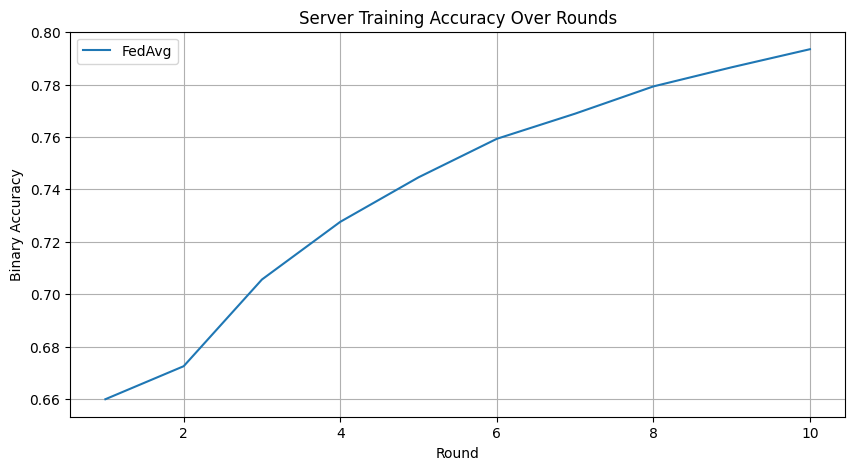

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(fedavg_global['round'], fedavg_global['accuracy'], label='FedAvg')
# plt.plot(perfedavg_global['round'], perfedavg_global['accuracy'], label='Per-FedAvg')
# plt.plot(ditto_global['round'], ditto_global['accuracy'], label='Ditto')
plt.xlabel('Round')
plt.ylabel('Binary Accuracy')
plt.title('Server Training Accuracy Over Rounds')
plt.legend()
plt.grid(True)
plt.show()

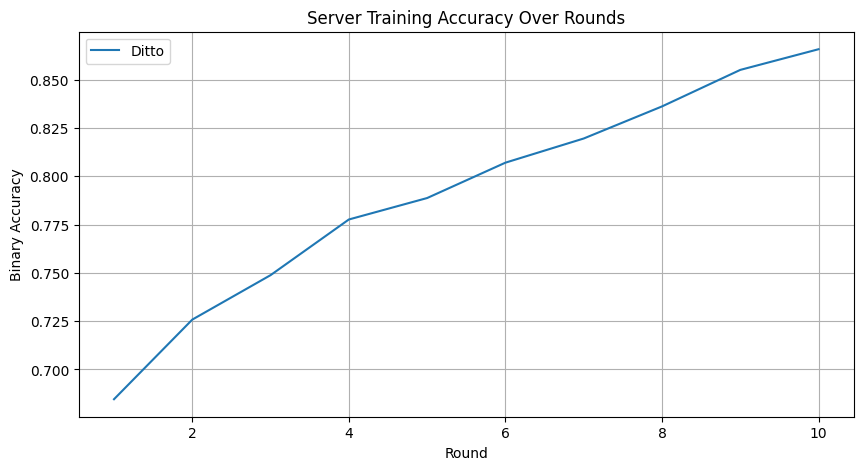

In [19]:
plt.figure(figsize=(10, 5))
# plt.plot(fedavg_global['round'], fedavg_global['accuracy'], label='FedAvg')
# plt.plot(perfedavg_global['round'], perfedavg_global['accuracy'], label='Per-FedAvg')
plt.plot(ditto_global['round'], ditto_global['accuracy'], label='Ditto')
plt.xlabel('Round')
plt.ylabel('Binary Accuracy')
plt.title('Server Training Accuracy Over Rounds')
plt.legend()
plt.grid(True)
plt.show()

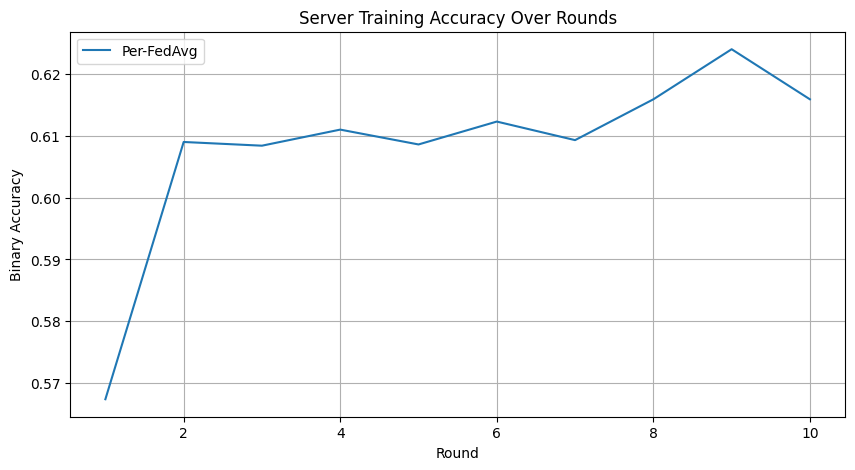

In [20]:
plt.figure(figsize=(10, 5))
# plt.plot(fedavg_global['round'], fedavg_global['accuracy'], label='FedAvg')
plt.plot(perfedavg_global['round'], perfedavg_global['accuracy'], label='Per-FedAvg')
# plt.plot(ditto_global['round'], ditto_global['accuracy'], label='Ditto')
plt.xlabel('Round')
plt.ylabel('Binary Accuracy')
plt.title('Server Training Accuracy Over Rounds')
plt.legend()
plt.grid(True)
plt.show()

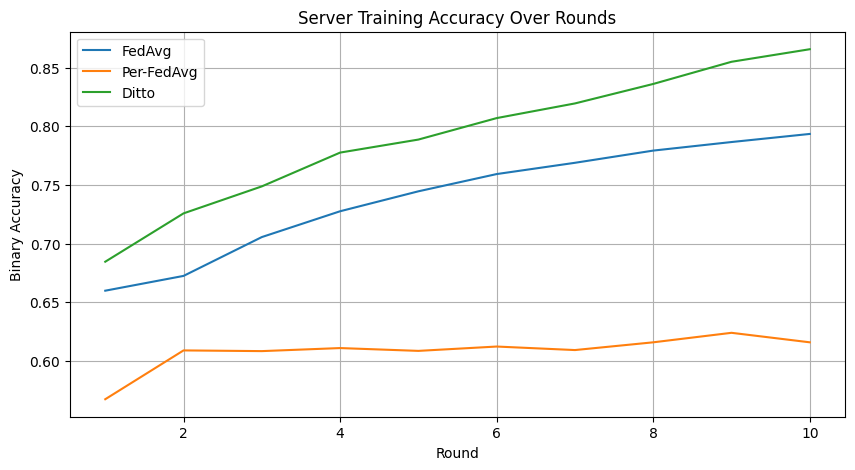

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(fedavg_global['round'], fedavg_global['accuracy'], label='FedAvg')
plt.plot(perfedavg_global['round'], perfedavg_global['accuracy'], label='Per-FedAvg')
plt.plot(ditto_global['round'], ditto_global['accuracy'], label='Ditto')
plt.xlabel('Round')
plt.ylabel('Binary Accuracy')
plt.title('Server Training Accuracy Over Rounds')
plt.legend()
plt.grid(True)

plt.show()

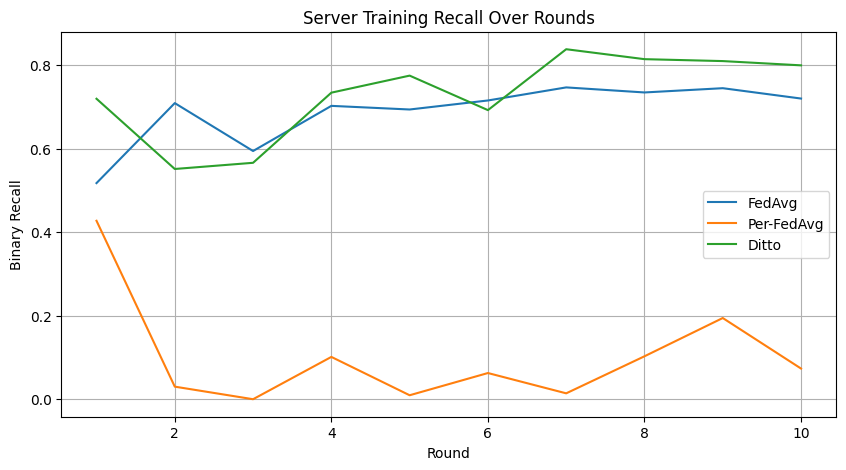

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(fedavg_global['round'], fedavg_global['recall'], label='FedAvg')
plt.plot(perfedavg_global['round'], perfedavg_global['recall'], label='Per-FedAvg')
plt.plot(ditto_global['round'], ditto_global['recall'], label='Ditto')
plt.xlabel('Round')
plt.ylabel('Binary Recall')
plt.title('Server Training Recall Over Rounds')
plt.legend()
plt.grid(True)
plt.show()

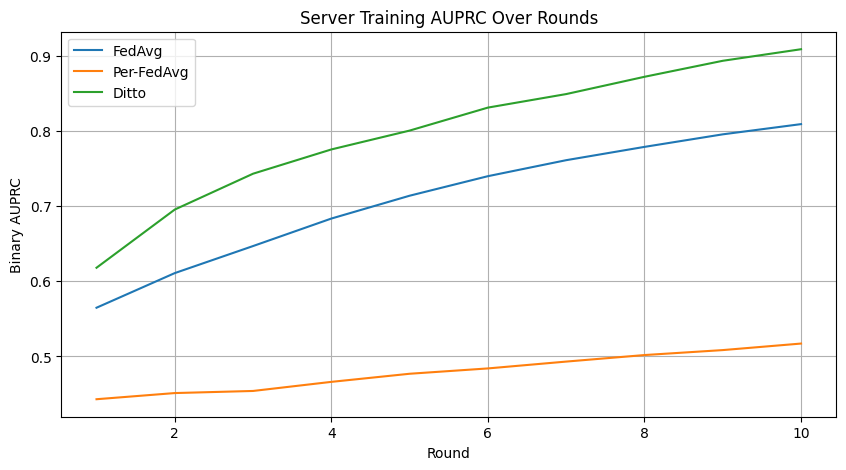

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(fedavg_global['round'], fedavg_global['auprc'], label='FedAvg')
plt.plot(perfedavg_global['round'], perfedavg_global['auprc'], label='Per-FedAvg')
plt.plot(ditto_global['round'], ditto_global['auprc'], label='Ditto')
plt.xlabel('Round')
plt.ylabel('Binary AUPRC')
plt.title('Server Training AUPRC Over Rounds')
plt.legend()
plt.grid(True)
plt.show()

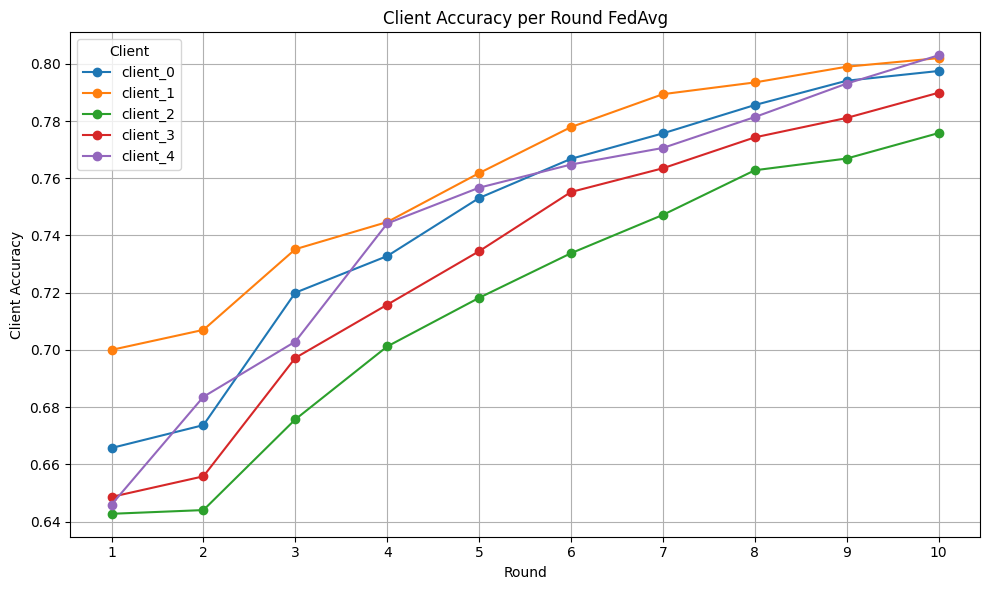

In [24]:
# Pivot the data so rows are rounds and columns are clients
pivot = fedavg_client.pivot(index='round', columns='client', values='personal_acc')

# Plot
plt.figure(figsize=(10, 6))
for client in pivot.columns:
    plt.plot(pivot.index, pivot[client], marker='o', label=client)

plt.title("Client Accuracy per Round FedAvg")
plt.xlabel("Round")
plt.ylabel("Client Accuracy")
plt.xticks(pivot.index)
plt.legend(title="Client")
plt.grid(True)
plt.tight_layout()
# plt.savefig("client_accuracy_per_round.png", dpi=300)
plt.show()

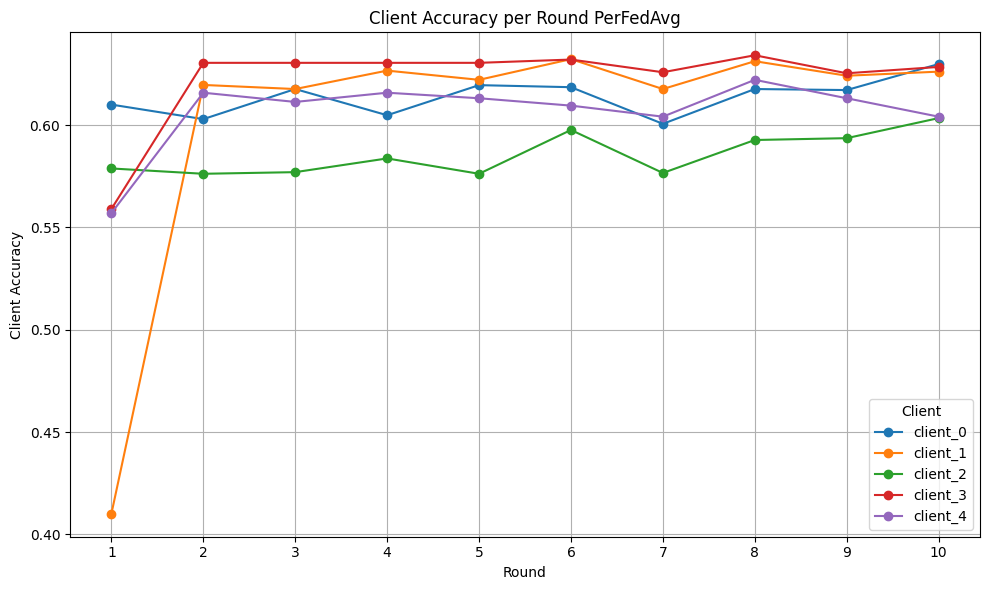

In [25]:
# Pivot the data so rows are rounds and columns are clients
pivot = perfedavg_client.pivot(index='round', columns='client', values='personal_acc')

# Plot
plt.figure(figsize=(10, 6))
for client in pivot.columns:
    plt.plot(pivot.index, pivot[client], marker='o', label=client)

plt.title("Client Accuracy per Round PerFedAvg")
plt.xlabel("Round")
plt.ylabel("Client Accuracy")
plt.xticks(pivot.index)
plt.legend(title="Client")
plt.grid(True)
plt.tight_layout()
# plt.savefig("client_accuracy_per_round.png", dpi=300)
plt.show()

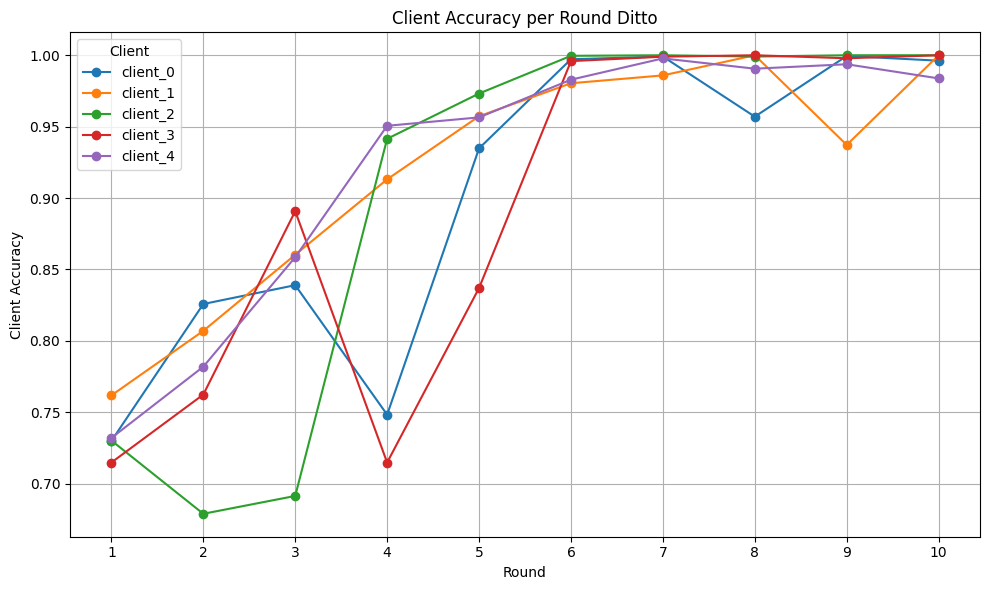

In [26]:
# Pivot the data so rows are rounds and columns are clients
pivot = ditto_client.pivot(index='round', columns='client', values='personal_acc')

# Plot
plt.figure(figsize=(10, 6))
for client in pivot.columns:
    plt.plot(pivot.index, pivot[client], marker='o', label=client)

plt.title("Client Accuracy per Round Ditto")
plt.xlabel("Round")
plt.ylabel("Client Accuracy")
plt.xticks(pivot.index)
plt.legend(title="Client")
plt.grid(True)
plt.tight_layout()
# plt.savefig("client_accuracy_per_round.png", dpi=300)
plt.show()

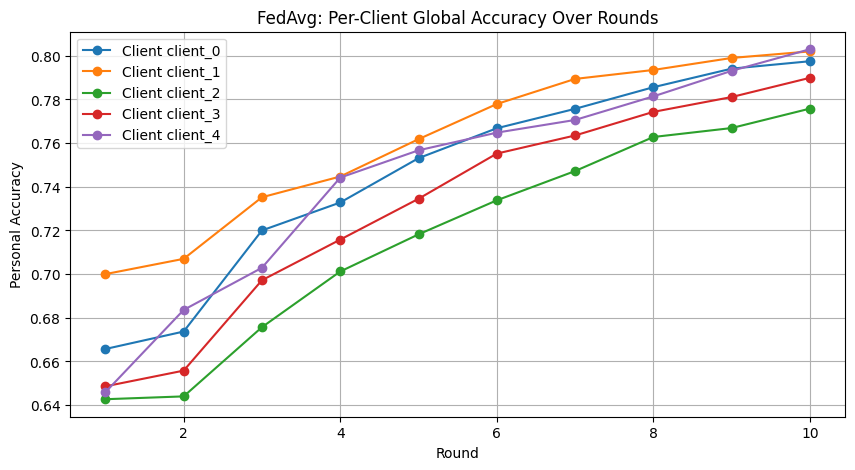

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Make sure accuracy is numeric
fedavg_client['personal_acc'] = fedavg_client['personal_acc'].astype(float)

plt.figure(figsize=(10,5))
for cid in sorted(fedavg_client['client'].unique()):
    sub = fedavg_client[fedavg_client['client'] == cid]
    plt.plot(sub['round'], sub['personal_acc'], marker='o', label=f'Client {cid}')
plt.title('FedAvg: Per-Client Global Accuracy Over Rounds')
plt.xlabel('Round'); plt.ylabel('Personal Accuracy')
plt.grid(True); plt.legend()
plt.show()

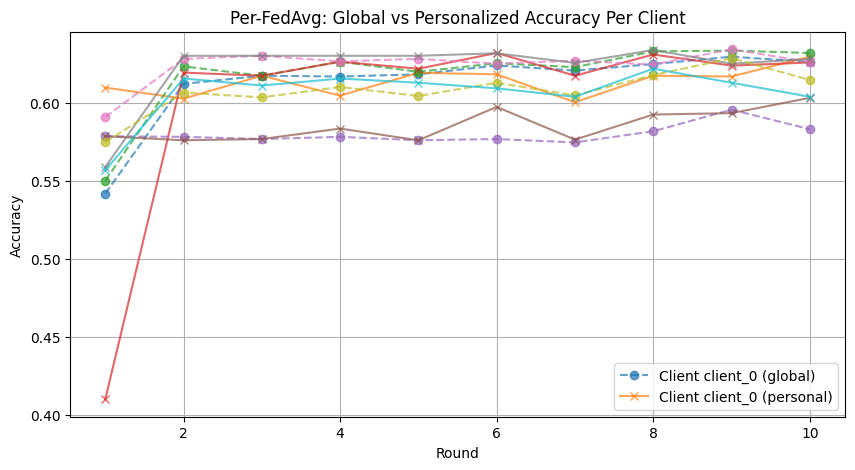

In [31]:
plt.figure(figsize=(10,5))
for cid in sorted(perfedavg_client['client'].unique()):
    sub = perfedavg_client[perfedavg_client['client'] == cid]
    plt.plot(sub['round'], sub['global_acc'],  '--', marker='o', alpha=0.7,
             label=f'Client {cid} (global)' if cid == perfedavg_client['client'].min() else None)
    plt.plot(sub['round'], sub['personal_acc'], '-', marker='x', alpha=0.7,
             label=f'Client {cid} (personal)' if cid == perfedavg_client['client'].min() else None)

plt.title('Per-FedAvg: Global vs Personalized Accuracy Per Client')
plt.xlabel('Round'); plt.ylabel('Accuracy')
plt.grid(True); plt.legend()
plt.show()

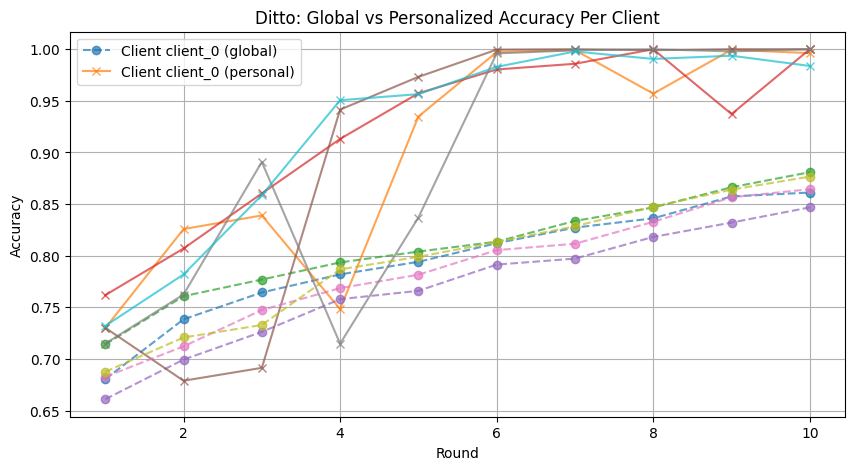

In [32]:
plt.figure(figsize=(10,5))
for cid in sorted(ditto_client['client'].unique()):
    sub = ditto_client[ditto_client['client'] == cid]
    plt.plot(sub['round'], sub['global_acc'],  '--', marker='o', alpha=0.7,
             label=f'Client {cid} (global)' if cid == ditto_client['client'].min() else None)
    plt.plot(sub['round'], sub['personal_acc'], '-', marker='x', alpha=0.7,
             label=f'Client {cid} (personal)' if cid == ditto_client['client'].min() else None)

plt.title('Ditto: Global vs Personalized Accuracy Per Client')
plt.xlabel('Round'); plt.ylabel('Accuracy')
plt.grid(True); plt.legend()
plt.show()


In [34]:
import numpy as np

# FedAvg fairness
fed_fair = (
    fedavg_client
    .groupby('round')['personal_acc']
    .agg(['mean', 'std', 'min'])
    .rename(columns={'min': 'worst'})
)
fed_fair['method'] = 'FedAvg'

# Per-FedAvg fairness (using global_acc for fairness)
pf_fair = (
    perfedavg_client
    .groupby('round')['global_acc']
    .agg(['mean', 'std', 'min'])
    .rename(columns={'min': 'worst'})
)
pf_fair['method'] = 'Per-FedAvg'

# Ditto fairness: use global_acc_mean/std from global_metrics_ditto
# and worst client from per_client_metrics_ditto
ditto_client['global_acc'] = ditto_client['global_acc'].astype(float)
ditto_worst = (
    ditto_client.groupby('round')['global_acc']
    .agg(['mean', 'std', 'min'])
    .rename(columns={'min': 'worst'})
)
ditto_worst['method'] = 'Ditto'

fair_all = (
    pd.concat([fed_fair, pf_fair, ditto_worst])
    .reset_index()   # keep 'round' as column
)


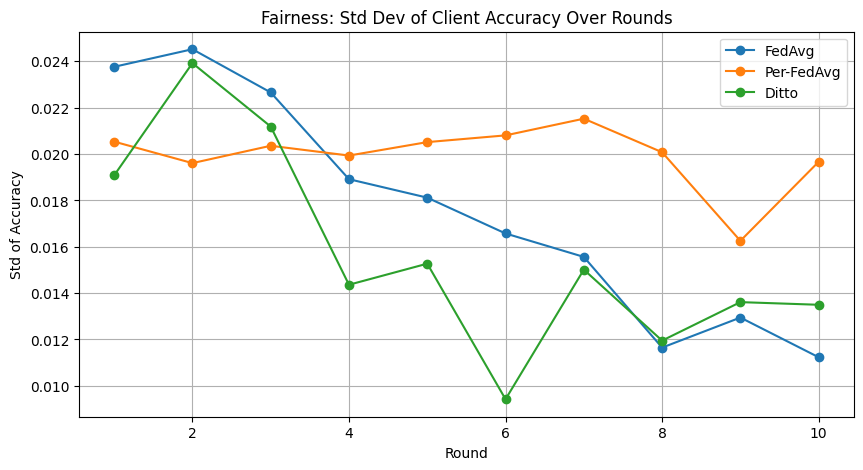

In [35]:
plt.figure(figsize=(10,5))
for method in ['FedAvg', 'Per-FedAvg', 'Ditto']:
    sub = fair_all[fair_all['method'] == method]
    plt.plot(sub['round'], sub['std'], marker='o', label=method)

plt.title('Fairness: Std Dev of Client Accuracy Over Rounds')
plt.xlabel('Round'); plt.ylabel('Std of Accuracy')
plt.grid(True); plt.legend()
plt.show()


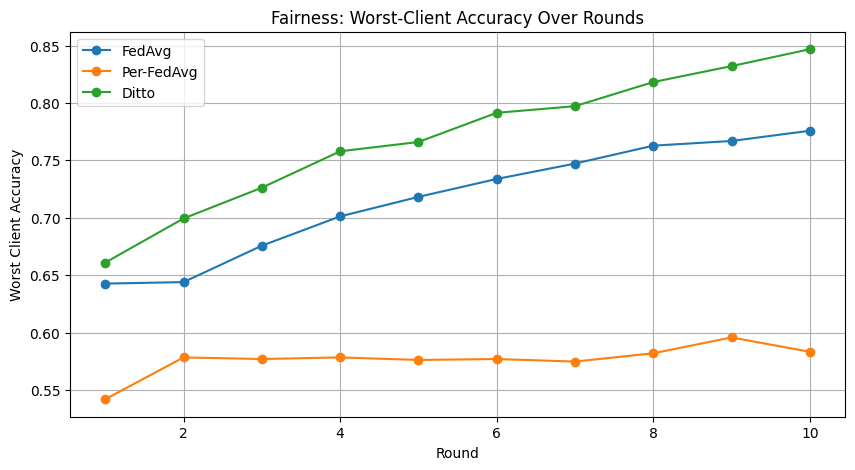

In [36]:
plt.figure(figsize=(10,5))
for method in ['FedAvg', 'Per-FedAvg', 'Ditto']:
    sub = fair_all[fair_all['method'] == method]
    plt.plot(sub['round'], sub['worst'], marker='o', label=method)

plt.title('Fairness: Worst-Client Accuracy Over Rounds')
plt.xlabel('Round'); plt.ylabel('Worst Client Accuracy')
plt.grid(True); plt.legend()
plt.show()


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Paths on the cluster
base = "/net/scratch/kmballantyne/msds_final/scripts"

fedavg_client = pd.read_csv(f"{base}/per_client_metrics.csv")
perfedavg_client = pd.read_csv(f"{base}/per_client_metrics_perfedavg.csv")
ditto_client = pd.read_csv(f"{base}/per_client_metrics_ditto.csv")

# Make sure round is numeric
for df in [fedavg_client, perfedavg_client, ditto_client]:
    df["round"] = df["round"].astype(int)

In [39]:
def client_id_from_str(s):
    # "client_0" -> 0
    return int(str(s).split("_")[-1])

fedavg_client["client_id"] = fedavg_client["client"].apply(client_id_from_str)
perfedavg_client["client_id"] = perfedavg_client["client"].apply(client_id_from_str)
ditto_client["client_id"] = ditto_client["client"].apply(client_id_from_str)

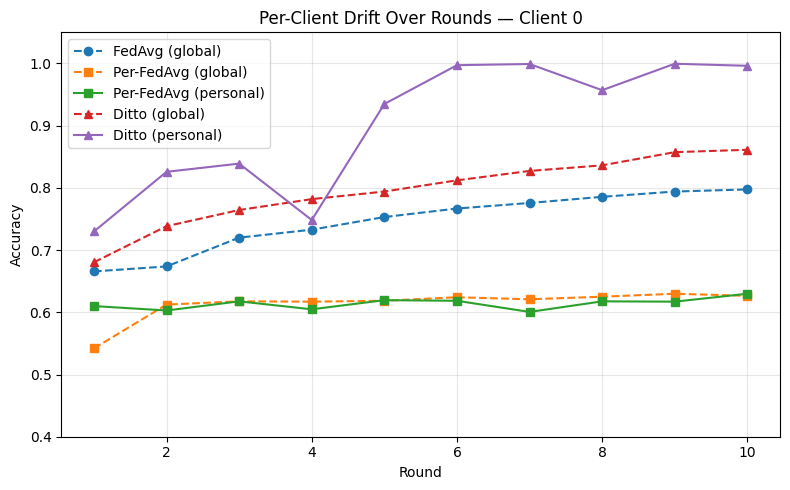

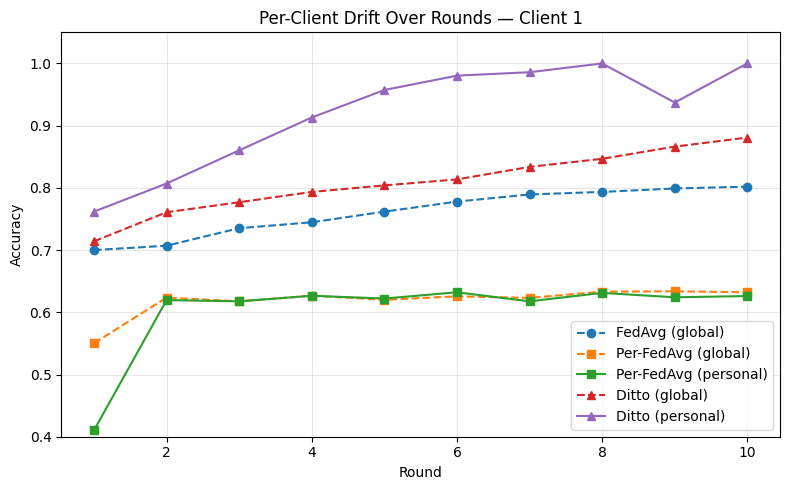

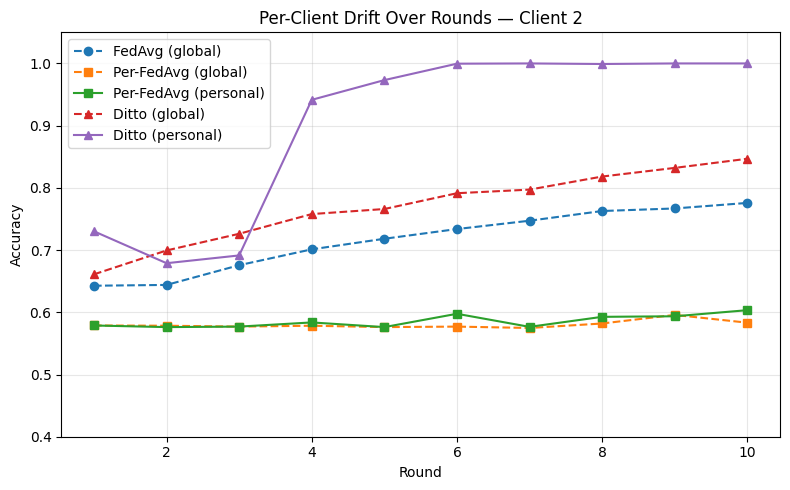

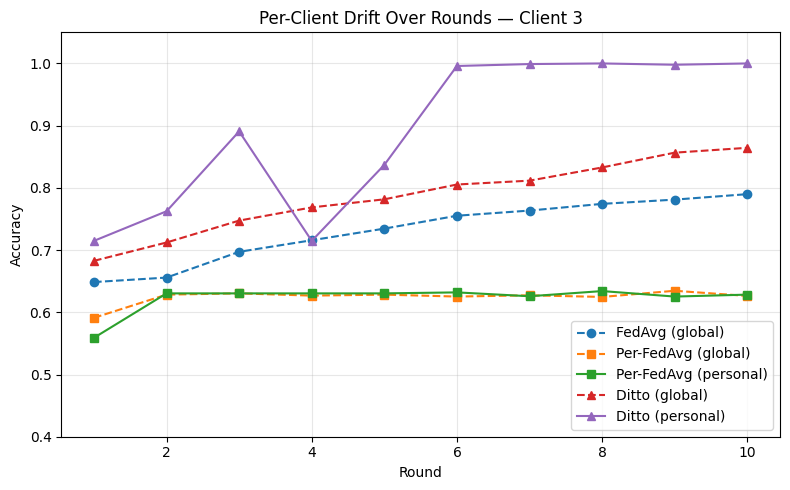

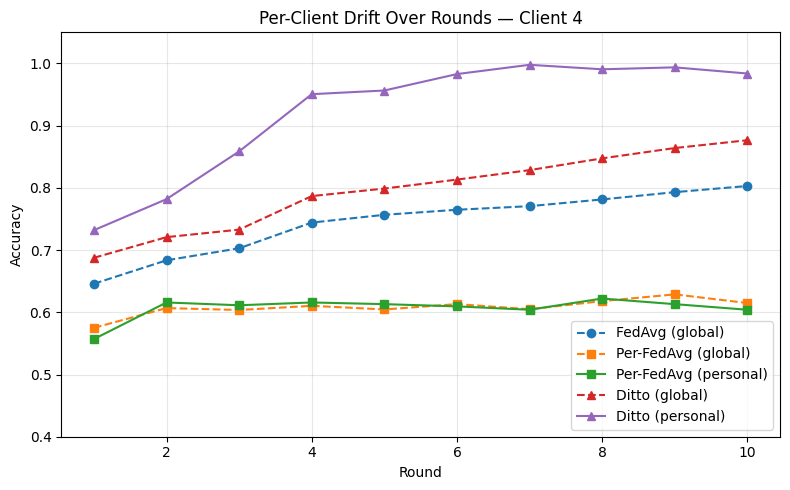

In [41]:
clients = sorted(fedavg_client["client_id"].unique())

for cid in clients:
    plt.figure(figsize=(8,5))

    # --- FedAvg (global only) ---
    fa = fedavg_client[fedavg_client["client_id"] == cid]
    plt.plot(
        fa["round"], fa["accuracy"],
        marker="o", linestyle="--",
        label="FedAvg (global)"
    )

    # --- Per-FedAvg (global + personal) ---
    pf = perfedavg_client[perfedavg_client["client_id"] == cid]
    plt.plot(
        pf["round"], pf["global_acc"],
        marker="s", linestyle="--",
        label="Per-FedAvg (global)"
    )
    plt.plot(
        pf["round"], pf["personal_acc"],
        marker="s", linestyle="-",
        label="Per-FedAvg (personal)"
    )

    # --- Ditto (global + personal) ---
    dt = ditto_client[ditto_client["client_id"] == cid]
    plt.plot(
        dt["round"], dt["global_acc"],
        marker="^", linestyle="--",
        label="Ditto (global)"
    )
    plt.plot(
        dt["round"], dt["personal_acc"],
        marker="^", linestyle="-",
        label="Ditto (personal)"
    )

    plt.title(f"Per-Client Drift Over Rounds — Client {cid}")
    plt.xlabel("Round")
    plt.ylabel("Accuracy")
    plt.grid(True, alpha=0.3)
    plt.ylim(0.4, 1.05)   # adjust if you want tighter/looser view
    plt.legend()
    plt.tight_layout()
    plt.show()


In [42]:
# --- FedAvg fairness (global only) ---
fedavg_fair = (
    fedavg_client.groupby("round")["accuracy"]
    .std()
    .reset_index(name="std_acc")
)

# --- Per-FedAvg fairness (global and personal) ---
perfed_fair_global = (
    perfedavg_client.groupby("round")["global_acc"]
    .std()
    .reset_index(name="std_global")
)
perfed_fair_personal = (
    perfedavg_client.groupby("round")["personal_acc"]
    .std()
    .reset_index(name="std_personal")
)

# --- Ditto fairness (global and personal) ---
ditto_fair_global = (
    ditto_client.groupby("round")["global_acc"]
    .std()
    .reset_index(name="std_global")
)
ditto_fair_personal = (
    ditto_client.groupby("round")["personal_acc"]
    .std()
    .reset_index(name="std_personal")
)


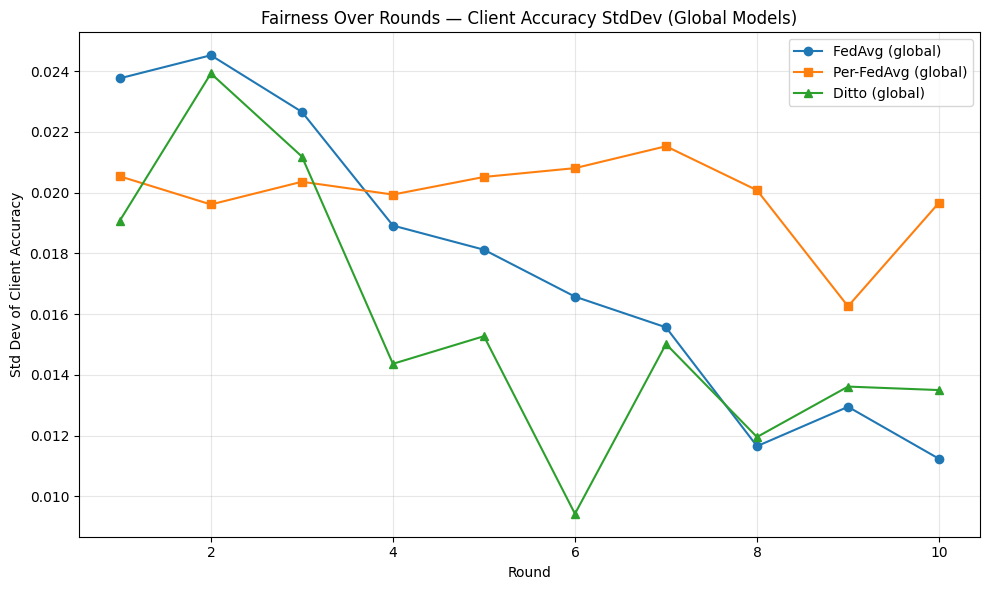

In [43]:
plt.figure(figsize=(10,6))

plt.plot(fedavg_fair["round"], fedavg_fair["std_acc"],
         marker="o", label="FedAvg (global)")

plt.plot(perfed_fair_global["round"], perfed_fair_global["std_global"],
         marker="s", label="Per-FedAvg (global)")

plt.plot(ditto_fair_global["round"], ditto_fair_global["std_global"],
         marker="^", label="Ditto (global)")

plt.title("Fairness Over Rounds — Client Accuracy StdDev (Global Models)")
plt.xlabel("Round")
plt.ylabel("Std Dev of Client Accuracy")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


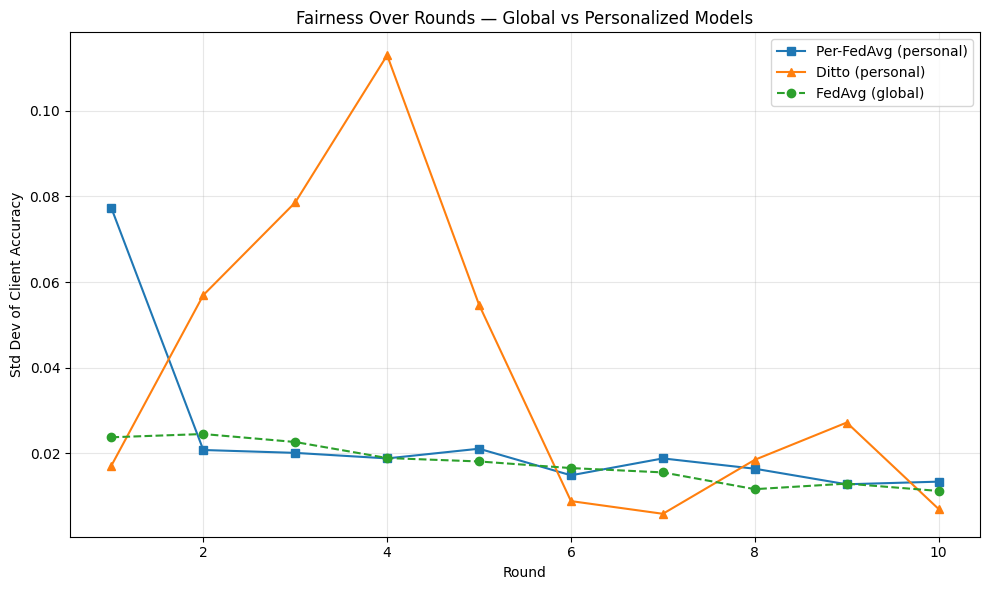

In [44]:
plt.figure(figsize=(10,6))

# Personalized curves
plt.plot(perfed_fair_personal["round"], perfed_fair_personal["std_personal"],
         marker="s", linestyle="-", label="Per-FedAvg (personal)")

plt.plot(ditto_fair_personal["round"], ditto_fair_personal["std_personal"],
         marker="^", linestyle="-", label="Ditto (personal)")

# For comparison add global FedAvg
plt.plot(fedavg_fair["round"], fedavg_fair["std_acc"],
         marker="o", linestyle="--", label="FedAvg (global)")

plt.title("Fairness Over Rounds — Global vs Personalized Models")
plt.xlabel("Round")
plt.ylabel("Std Dev of Client Accuracy")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [51]:
print(fedavg_fair["std_acc"].mean())

0.01759400984720006


In [56]:
fedavg_fair

,round,std_acc
0,1,0.023764
1,2,0.024523
2,3,0.022658
3,4,0.018915
4,5,0.018119
5,6,0.016573
6,7,0.015562
7,8,0.011648
8,9,0.012945
9,10,0.011232


In [52]:
print(perfed_fair_global["std_global"].mean())

0.01992849559829009


In [57]:
perfed_fair_global

,round,std_global
0,1,0.020536
1,2,0.019609
2,3,0.020357
3,4,0.019935
4,5,0.020515
5,6,0.020806
6,7,0.021526
7,8,0.020078
8,9,0.016255
9,10,0.019667


In [53]:
print(perfed_fair_personal["std_personal"].mean())

0.023444078553149485


In [58]:
perfed_fair_personal

,round,std_personal
0,1,0.077274
1,2,0.020794
2,3,0.020120
3,4,0.018832
4,5,0.021091
5,6,0.014885
6,7,0.018829
7,8,0.016421
8,9,0.012789
9,10,0.013405


In [54]:
print(ditto_fair_global["std_global"].mean())

0.015731183301957108


In [60]:
ditto_fair_global

,round,std_global
0,1,0.019078
1,2,0.023923
2,3,0.021187
3,4,0.014361
4,5,0.015270
5,6,0.009421
6,7,0.015013
7,8,0.011950
8,9,0.013611
9,10,0.013496


In [55]:
print(ditto_fair_personal["std_personal"].mean())

0.03878287269522683


In [61]:
ditto_fair_personal

,round,std_personal
0,1,0.017149
1,2,0.056952
2,3,0.078588
3,4,0.112948
4,5,0.054705
5,6,0.008863
6,7,0.005899
7,8,0.018507
8,9,0.027203
9,10,0.007016
